In [32]:
from astropy.io import ascii as ac
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from astropy.stats import sigma_clip
from astropy.table import Table
import scipy.optimize as opt
import pandas as pd
from astropy.table import vstack

import csv

from scipy.optimize import curve_fit




a=58738.1368981
b=59394.2194213
c=58831.5684375
d=59017.3841088



newpto2020=ac.read('filtered_file_frompeaktojune2020_withptremoved.csv')


def fluxerr(m,magerr):
    fun_err=0.4 * np.log(10)* 10**(0.4*26.325) * 10**(0.4 * (m - 26.325))
    flux_err = abs(fun_err * magerr)
    return flux_err

for i in newpto2020['filtered_mjd']:
    error_in_flux=fluxerr(newpto2020['filtered_mag'], newpto2020['filtered_magerr'])

newpto2020['flux_err']=error_in_flux





allmjd=newpto2020['filtered_mjd']
for i in allmjd:
    days_since_ref=allmjd-allmjd[0]+1
    
newpto2020['Days_ref']=days_since_ref 

In [33]:
newpto2020

filtered_mjd,filtered_mag,filtered_magerr,filtered_days,filtered_flux,flux_err,Days_ref
float64,float64,float64,float64,float64,float64,float64
58850.5565509,17.6167622,0.021668956,649.1778472000005,11048959.175456002,222238.11652489097,1.0
58853.5360301,17.6125488,0.021627722,652.1573263999962,11091920.00833127,220956.0912702043,3.979479199995694
58856.5495139,17.6144333,0.021646151,655.1708101999975,11072684.586922932,221528.53921283013,6.992962999996962
58861.5156713,17.6192436,0.021693317,660.1369676000031,11023736.123100692,222997.03188722616,11.959120400002575
58864.469456,17.6277313,0.021777045,663.0907522999987,10937894.469361164,225614.57310908948,14.91290509999817
58872.4502662,17.5918293,0.021427158,671.0715625000012,11305623.771454524,214769.1864676351,22.893715300000622
...,...,...,...,...,...,...
59015.1947685,17.7424831,0.022973089,813.8160647999975,9840858.991850372,264538.15185879136,165.638217599997
59015.3826273,17.6898251,0.022409108,814.0039236000011,10329902.179216813,245827.40105275143,165.8260764000006


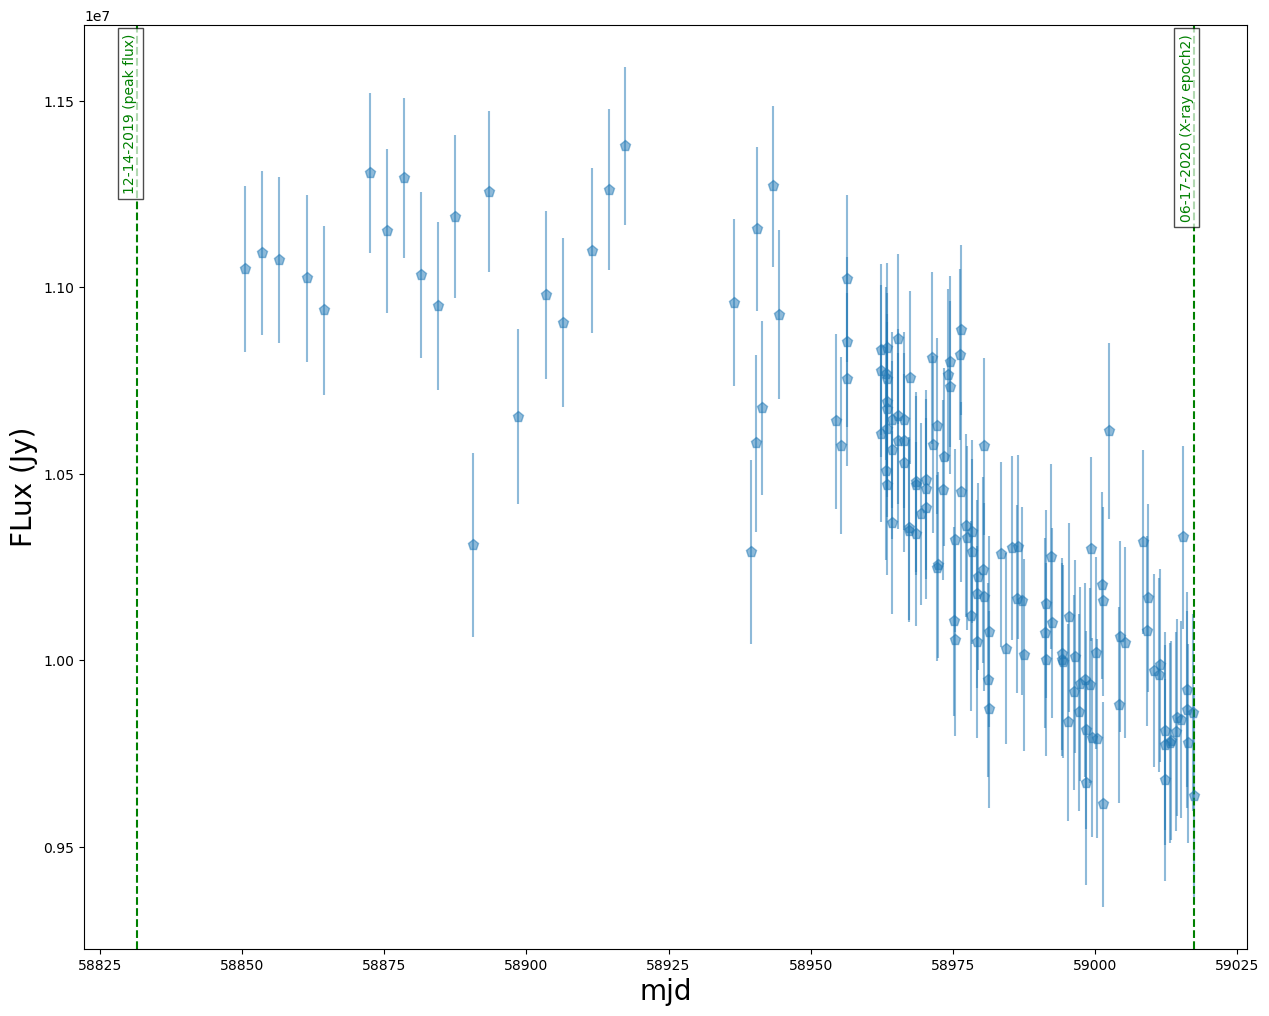

In [34]:
plt.figure(figsize=(15,12))
plt.errorbar(newpto2020['filtered_mjd'],newpto2020['filtered_flux'],yerr=newpto2020['flux_err'],fmt='p',markersize=8,alpha=0.5)
plt.xlabel('mjd', fontsize=20)
plt.ylabel('FLux (Jy)',fontsize=20)
#plt.ylim(18.1,17.3)

#plt.axvline(x=a, linestyle='dashed', color='g')
#plt.text(a, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'09-12-2019 (X-ray epoch1)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

#plt.axvline(x=b, linestyle='dashed', color='g')
#plt.text(b, plt.ylim()[1] - 0.105 * (plt.ylim()[1] - plt.ylim()[0]),'06-29-2021 (last decline)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

plt.axvline(x=c, linestyle='dashed', color='g')
plt.text(c, plt.ylim()[1] - 0.096* (plt.ylim()[1] - plt.ylim()[0]),'12-14-2019 (peak flux)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

plt.axvline(x=d, linestyle='dashed', color='g')
plt.text(d, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'06-17-2020 (X-ray epoch2)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

In [73]:
def modelfit(time,A,alpha,B,q,beta):
    #return A*(time**alpha)+B
    return (A * (time**alpha))+B+(q*(time**beta))
popt, pcov = curve_fit(modelfit,newpto2020['Days_ref'],newpto2020['filtered_flux'],sigma=newpto2020['flux_err'], maxfev=6000)

In [74]:
popt, pcov

(array([-3.52961135e+00,  2.43369708e+00,  1.11248903e+07, -1.81866096e+00,
         2.43353641e+00]),
 array([[ 3.70316636e+11,  8.83276505e+07,  2.32162378e+09,
         -3.70319351e+11, -7.04038165e+07],
        [ 8.83276505e+07,  9.58361286e+06,  1.81488779e+08,
         -8.87534670e+07, -1.87782943e+07],
        [ 2.32162378e+09,  1.81488779e+08,  6.71501318e+09,
         -2.33000935e+09, -3.55465696e+08],
        [-3.70319351e+11, -8.87534670e+07, -2.33000935e+09,
          3.70322085e+11,  7.12385105e+07],
        [-7.04038165e+07, -1.87782943e+07, -3.55465696e+08,
          7.12385105e+07,  3.68230366e+07]]))

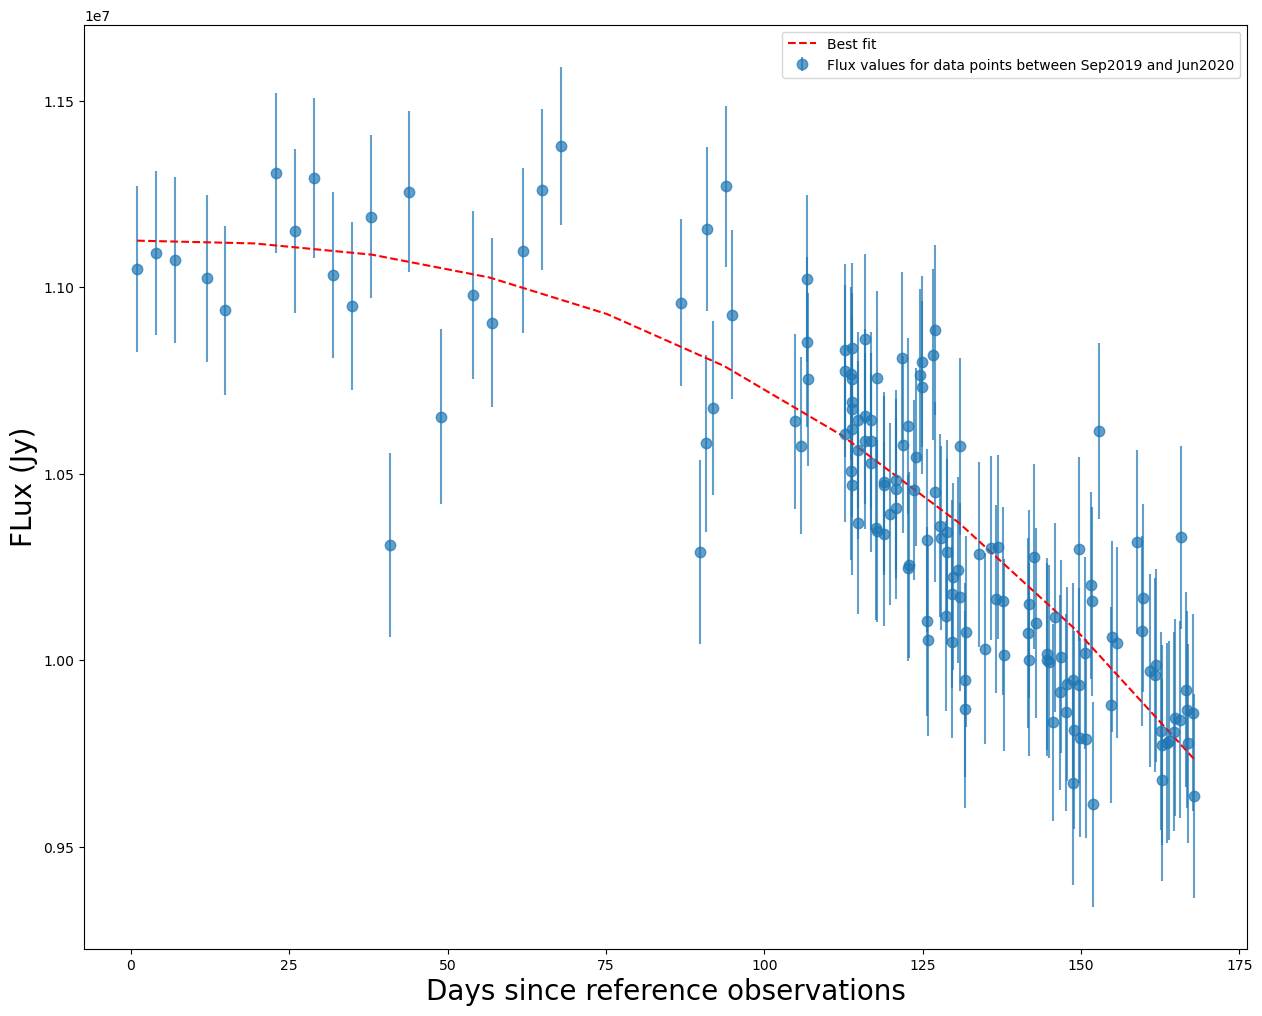

In [77]:

a_opt,b_opt, c_opt,d_opt,e_opt = popt

#f_model=np.linspace(0.001,180,10)

f_model=np.linspace(min(newpto2020['Days_ref']),max(newpto2020['Days_ref']),10)
d_model=modelfit(f_model,a_opt,b_opt, c_opt,d_opt,e_opt)








plt.figure(figsize=(15,12))
plt.errorbar(newpto2020['Days_ref'],newpto2020['filtered_flux'],yerr=newpto2020['flux_err'],label='Flux values for data points between Sep2019 and Jun2020',fmt='.',markersize=15,alpha=0.7)
plt.plot(f_model,d_model,'red',linestyle='dashed',label='Best fit')

plt.xlabel('Days since reference observations', fontsize=20)
plt.ylabel('FLux (Jy)',fontsize=20)
plt.legend(fontsize=10)
#plt.ylim(0.8*1e7,1.2*1e7)
#plt.axvline(x=a, linestyle='dashed', color='g')
#plt.text(a, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'09-12-2019 (X-ray epoch1)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

#plt.axvline(x=b, linestyle='dashed', color='g')
#plt.text(b, plt.ylim()[1] - 0.105 * (plt.ylim()[1] - plt.ylim()[0]),'06-29-2021 (last decline)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
'''
plt.axvline(x=649.177, linestyle='dashed', color='g')
plt.text(c, plt.ylim()[1] - 0.096* (plt.ylim()[1] - plt.ylim()[0]),'12-14-2019 (peak flux)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

plt.axvline(x=816.005, linestyle='dashed', color='g')
plt.text(d, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'06-17-2020 (X-ray epoch2)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
'''
plt.show()

In [79]:
def modelfit2(time,A,alpha,B):
    return A*(time**alpha)+B

In [49]:
decline2=ac.read('filtered_file_frompeaktojune2020_decline2.csv')

decmjd=decline2['filtered_mjd']
for i in decmjd:
    days_since_ref_dec=decmjd-decmjd[0]+1
    
decline2['Days_ref']=days_since_ref_dec

In [50]:
decline2

filtered_mjd,filtered_mag,filtered_magerr,filtered_days,filtered_flux,Days_ref,flux_err
float64,float64,float64,float64,float64,float64,float64
58954.4078009,17.6576729,0.022077482,753.0290972000003,10640378.792464973,1.0,235122.6020760653
58955.4115972,17.6643391,0.022145467,754.0328934999998,10575249.171553727,2.0037962999995216,237299.13933893584
58956.3659491,17.619278,0.021693658,754.9872453999997,11023386.857308893,2.958148199999414,223007.6027710974
58956.3738542,17.6362228,0.021861438,754.995150499999,10852683.279490821,2.966053299998748,228267.2073137821
58956.3857755,17.6462669,0.021962093,755.0070717999988,10752748.521403555,2.9779745999985607,231449.45703271282
58962.3534491,17.6382179,0.021881362,760.9747454000026,10832759.188397538,8.945648200002324,228895.46647543958
...,...,...,...,...,...,...
59015.1947685,17.7424831,0.022973089,813.8160647999975,9840858.991850372,61.7869675999973,264538.15185879136
59015.3826273,17.6898251,0.022409108,814.0039236000011,10329902.179216813,61.97482640000089,245827.40105275143


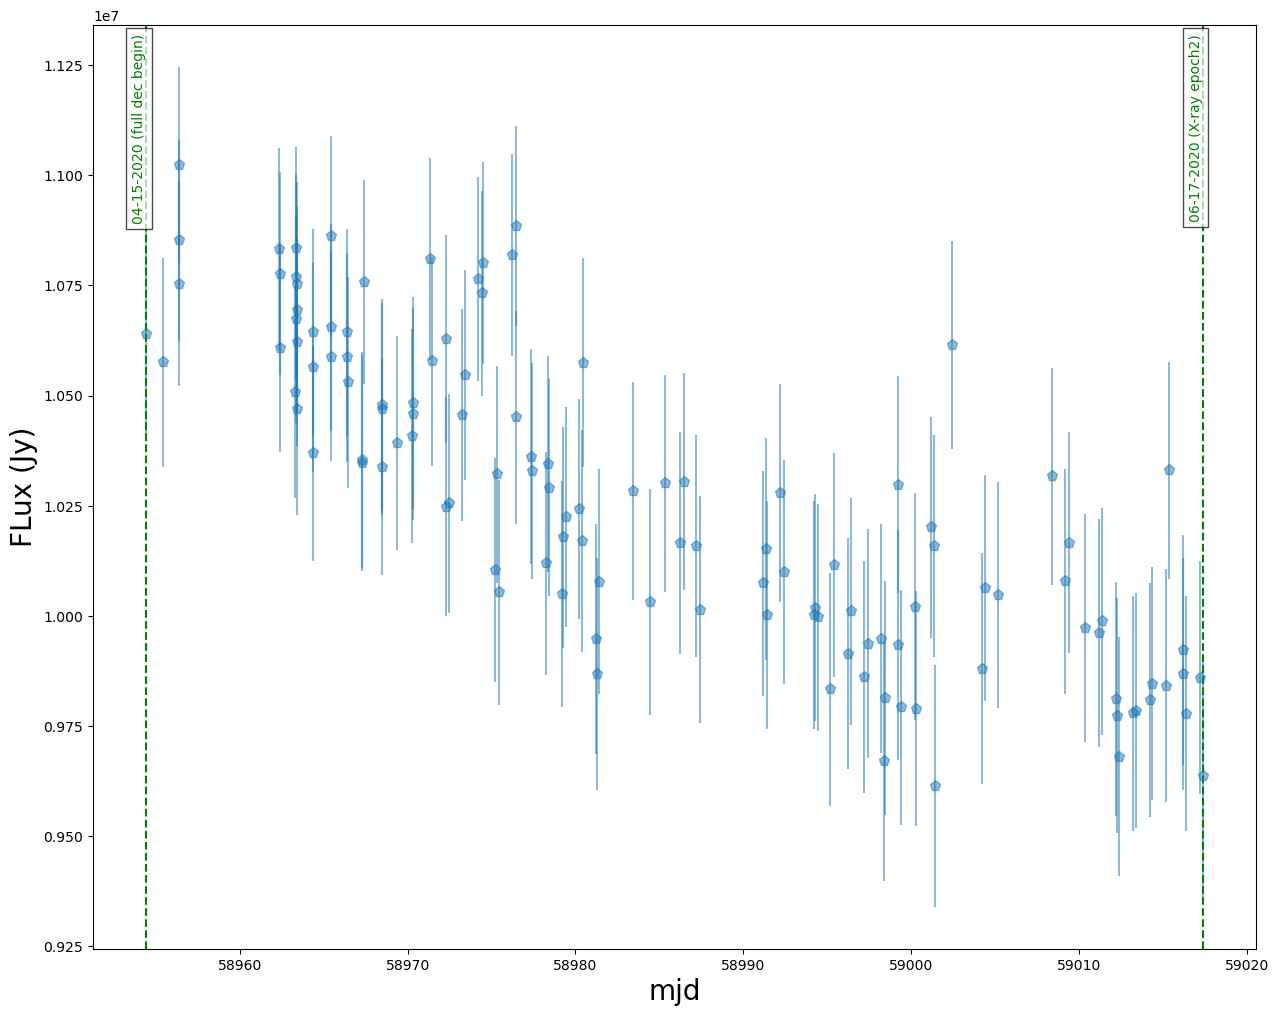

In [63]:
plt.figure(figsize=(15,12))
plt.errorbar(decline2['filtered_mjd'],decline2['filtered_flux'],yerr=decline2['flux_err'],fmt='p',markersize=8,alpha=0.5)
plt.xlabel('mjd', fontsize=20)
plt.ylabel('FLux (Jy)',fontsize=20)
#plt.ylim(18.1,17.3)

#plt.axvline(x=a, linestyle='dashed', color='g')
#plt.text(a, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'09-12-2019 (X-ray epoch1)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

#plt.axvline(x=b, linestyle='dashed', color='g')
#plt.text(b, plt.ylim()[1] - 0.105 * (plt.ylim()[1] - plt.ylim()[0]),'06-29-2021 (last decline)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
r=58954.4078009
plt.axvline(x=r, linestyle='dashed', color='g')
plt.text(r, plt.ylim()[1] - 0.112* (plt.ylim()[1] - plt.ylim()[0]),'04-15-2020 (full dec begin)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

plt.axvline(x=d, linestyle='dashed', color='g')
plt.text(d, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'06-17-2020 (X-ray epoch2)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
plt.show()

In [80]:
popt2, pcov2 = curve_fit(modelfit2,decline2['Days_ref'],decline2['filtered_flux'],sigma=decline2['flux_err'], maxfev=6000)

In [82]:
popt2, pcov2

(array([-7.74181862e+04,  6.50512575e-01,  1.09724014e+07]),
 array([[ 3.78312726e+09,  1.01762795e+04, -9.15170905e+09],
        [ 1.01762795e+04,  2.75530785e-02, -2.41983726e+04],
        [-9.15170905e+09, -2.41983726e+04,  2.34442717e+10]]))

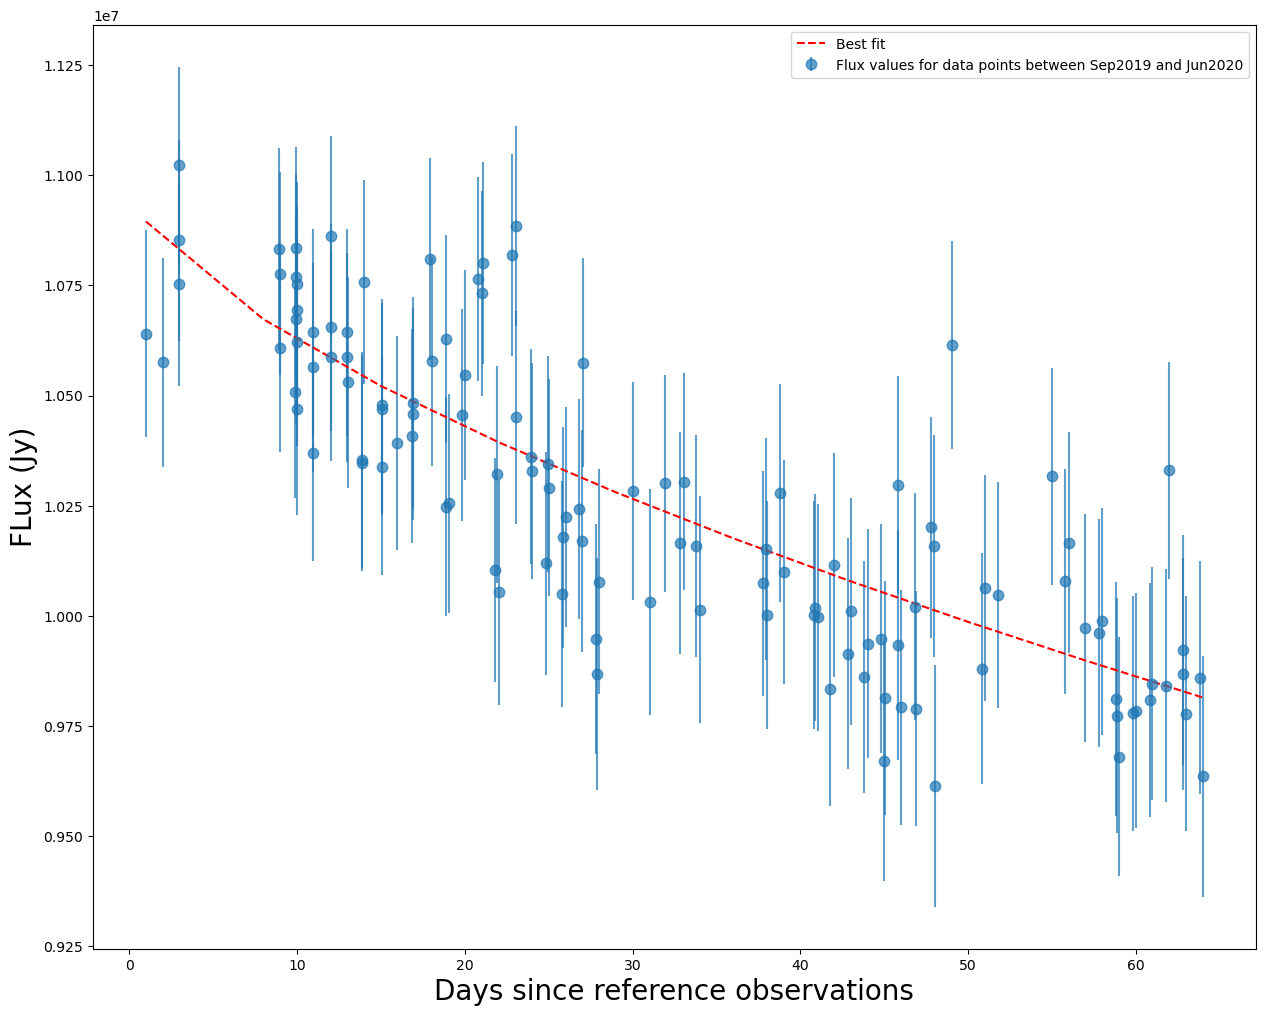

In [56]:
a_opt2,b_opt2, c_opt2 = popt2

#f_model=np.linspace(0.001,180,10)

f_model2=np.linspace(min(decline2['Days_ref']),max(decline2['Days_ref']),10)
d_model2=modelfit(f_model2,a_opt2,b_opt2, c_opt2)








plt.figure(figsize=(15,12))
plt.errorbar(decline2['Days_ref'],decline2['filtered_flux'],yerr=decline2['flux_err'],label='Flux values for data points between Sep2019 and Jun2020',fmt='.',markersize=15,alpha=0.7)
plt.plot(f_model2,d_model2,'red',linestyle='dashed',label='Best fit')

plt.xlabel('Days since reference observations', fontsize=20)
plt.ylabel('FLux (Jy)',fontsize=20)
plt.legend(fontsize=10)
#plt.ylim(0.8*1e7,1.2*1e7)
#plt.axvline(x=a, linestyle='dashed', color='g')
#plt.text(a, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'09-12-2019 (X-ray epoch1)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

#plt.axvline(x=b, linestyle='dashed', color='g')
#plt.text(b, plt.ylim()[1] - 0.105 * (plt.ylim()[1] - plt.ylim()[0]),'06-29-2021 (last decline)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
'''
plt.axvline(x=649.177, linestyle='dashed', color='g')
plt.text(c, plt.ylim()[1] - 0.096* (plt.ylim()[1] - plt.ylim()[0]),'12-14-2019 (peak flux)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

plt.axvline(x=816.005, linestyle='dashed', color='g')
plt.text(d, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'06-17-2020 (X-ray epoch2)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
'''
plt.show()

In [58]:
decline=ac.read('filtered_file_frompeaktojune2020_decline.csv')


decmjd2=decline['filtered_mjd']
for i in decmjd2:
    days_since_ref_dec2=decmjd2-decmjd2[0]+1
    
decline['Days_ref']=days_since_ref_dec2

In [59]:
decline

filtered_mjd,filtered_mag,filtered_magerr,filtered_days,filtered_flux,Days_ref,flux_err
float64,float64,float64,float64,float64,float64,float64
58936.4739699,17.6256371,0.021756325,735.0952661999982,10959012.162337689,1.0,224965.5707618412
58939.4481366,17.6939869,0.022452729,738.0694329000034,10290381.809328437,3.9741667000052985,247251.86411281937
58940.3742593,17.663681,0.022138737,738.9955555999986,10581661.116818823,4.900289400000474,237083.27677018874
58940.4770023,17.6063232,0.021567076,739.0982986000017,11155703.653832832,5.003032400003576,219076.71933705258
58941.5001736,17.6540222,0.022040417,740.1214698999975,10676216.420649704,6.026203699999314,233939.93615316664
58943.4585301,17.5952072,0.021459607,742.0798263999968,11270504.815805469,7.984560199998668,215764.66547569665
...,...,...,...,...,...,...
59015.1947685,17.7424831,0.022973089,813.8160647999975,9840858.991850372,79.7207985999994,264538.15185879136
59015.3826273,17.6898251,0.022409108,814.0039236000011,10329902.179216813,79.908657400003,245827.40105275143


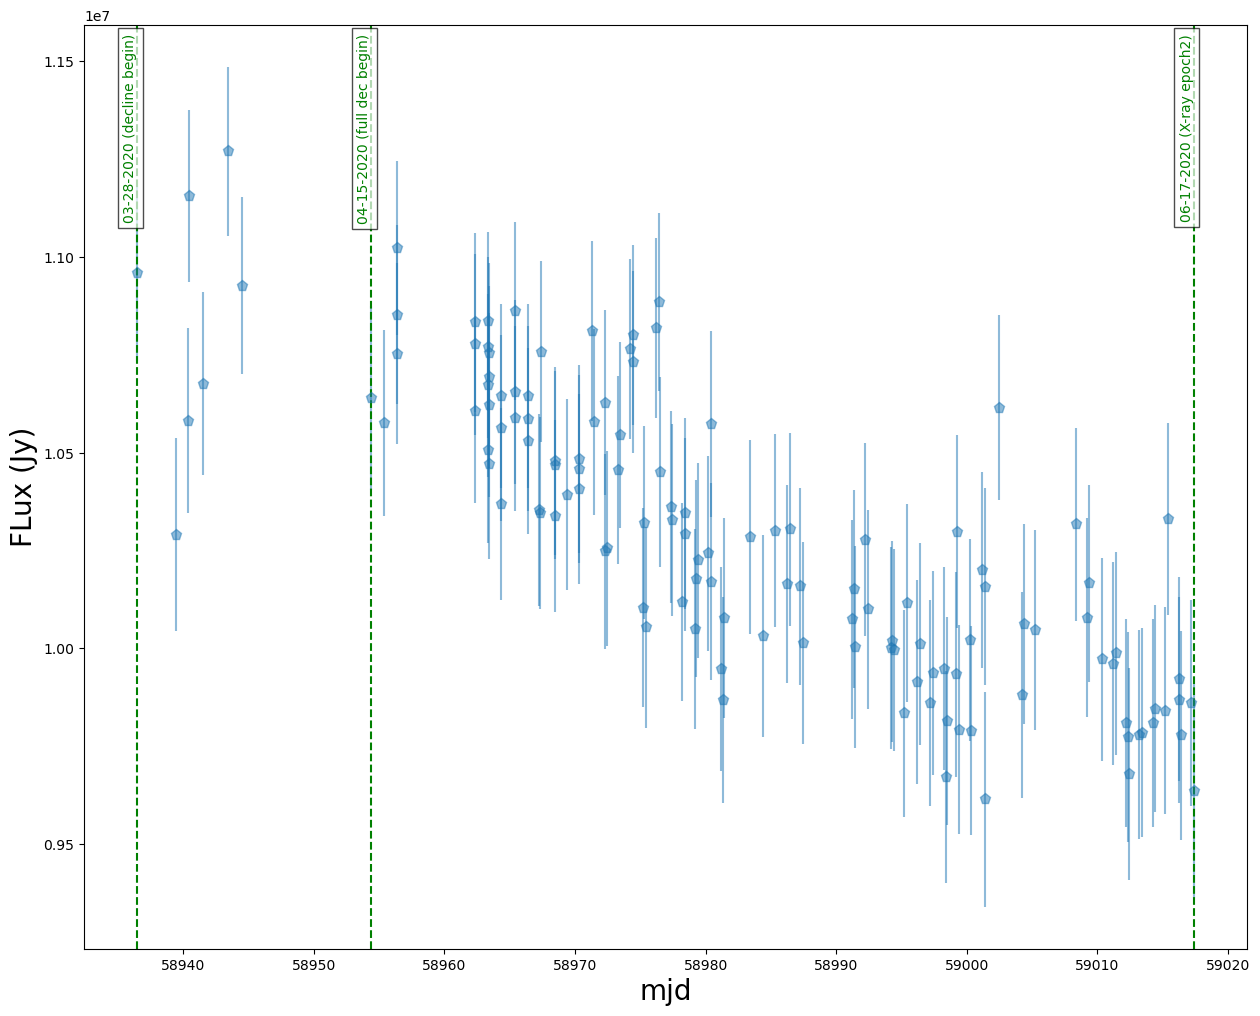

In [64]:
plt.figure(figsize=(15,12))
plt.errorbar(decline['filtered_mjd'],decline['filtered_flux'],yerr=decline['flux_err'],fmt='p',markersize=8,alpha=0.5)
plt.xlabel('mjd', fontsize=20)
plt.ylabel('FLux (Jy)',fontsize=20)
#plt.ylim(18.1,17.3)

#plt.axvline(x=a, linestyle='dashed', color='g')
#plt.text(a, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'09-12-2019 (X-ray epoch1)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

#plt.axvline(x=b, linestyle='dashed', color='g')
#plt.text(b, plt.ylim()[1] - 0.105 * (plt.ylim()[1] - plt.ylim()[0]),'06-29-2021 (last decline)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
r=58954.4078009
plt.axvline(x=r, linestyle='dashed', color='g')
plt.text(r, plt.ylim()[1] - 0.112* (plt.ylim()[1] - plt.ylim()[0]),'04-15-2020 (full dec begin)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))


q=58936.4739699
plt.axvline(x=q, linestyle='dashed', color='g')
plt.text(q, plt.ylim()[1] - 0.112* (plt.ylim()[1] - plt.ylim()[0]),'03-28-2020 (decline begin)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

plt.axvline(x=d, linestyle='dashed', color='g')
plt.text(d, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'06-17-2020 (X-ray epoch2)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
plt.show()

In [65]:
popt3, pcov3 = curve_fit(modelfit,decline['Days_ref'],decline['filtered_flux'],sigma=decline['flux_err'], maxfev=6000)

In [66]:
popt3, pcov3

(array([-1.31733686e+04,  1.02745273e+00,  1.09968311e+07]),
 array([[ 1.35248460e+08,  2.17484515e+03, -1.14813879e+09],
        [ 2.17484515e+03,  3.51491671e-02, -1.80040979e+04],
        [-1.14813879e+09, -1.80040979e+04,  1.12937665e+10]]))

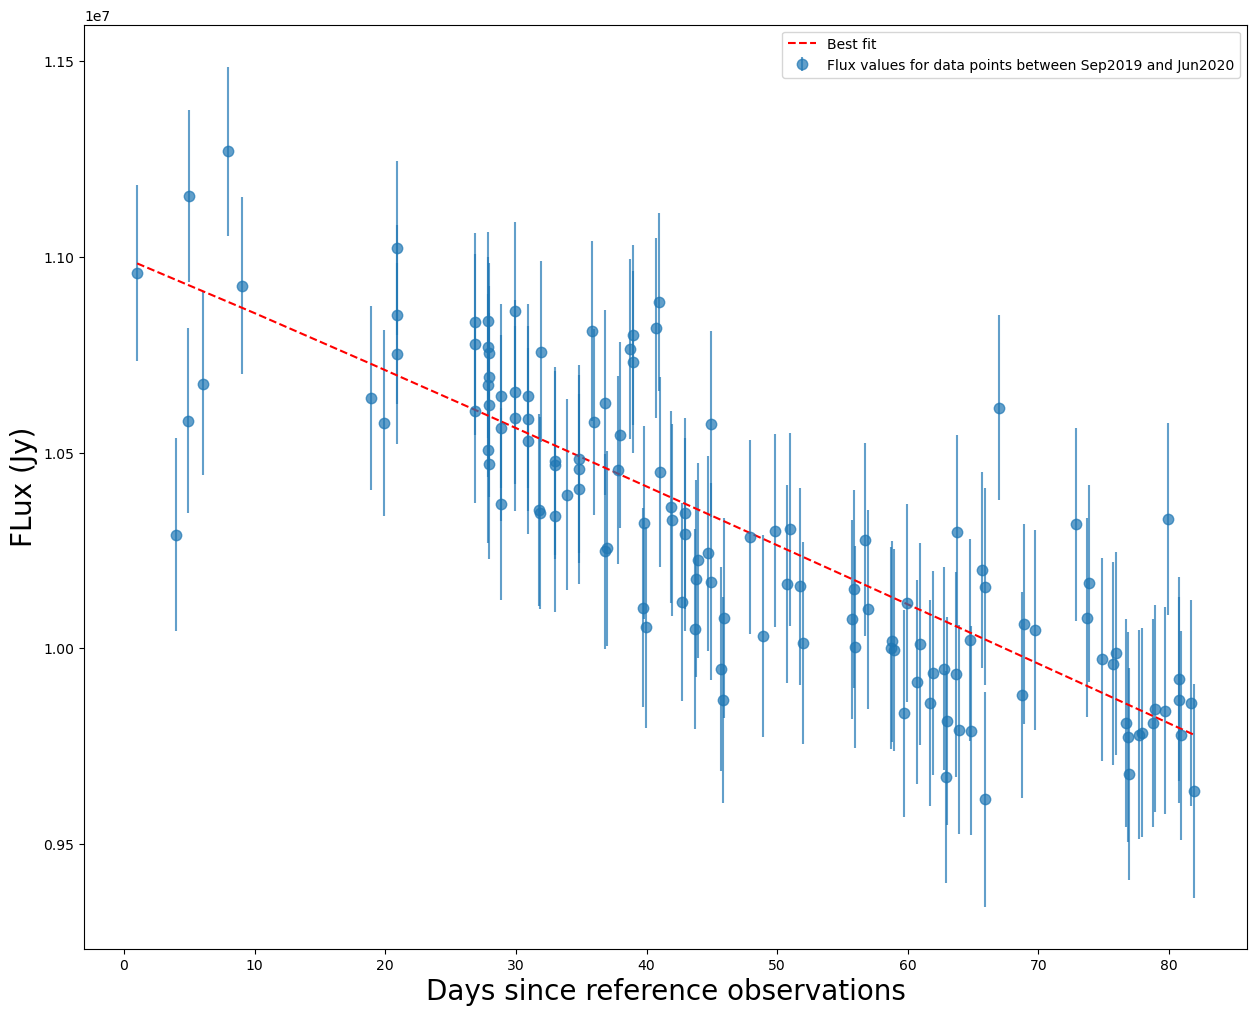

In [67]:
a_opt3,b_opt3, c_opt3 = popt3

#f_model=np.linspace(0.001,180,10)

f_model3=np.linspace(min(decline['Days_ref']),max(decline['Days_ref']),10)
d_model3=modelfit(f_model3,a_opt3,b_opt3, c_opt3)








plt.figure(figsize=(15,12))
plt.errorbar(decline['Days_ref'],decline['filtered_flux'],yerr=decline['flux_err'],label='Flux values for data points between Sep2019 and Jun2020',fmt='.',markersize=15,alpha=0.7)
plt.plot(f_model3,d_model3,'red',linestyle='dashed',label='Best fit')

plt.xlabel('Days since reference observations', fontsize=20)
plt.ylabel('FLux (Jy)',fontsize=20)
plt.legend(fontsize=10)
#plt.ylim(0.8*1e7,1.2*1e7)
#plt.axvline(x=a, linestyle='dashed', color='g')
#plt.text(a, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'09-12-2019 (X-ray epoch1)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

#plt.axvline(x=b, linestyle='dashed', color='g')
#plt.text(b, plt.ylim()[1] - 0.105 * (plt.ylim()[1] - plt.ylim()[0]),'06-29-2021 (last decline)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
'''
plt.axvline(x=649.177, linestyle='dashed', color='g')
plt.text(c, plt.ylim()[1] - 0.096* (plt.ylim()[1] - plt.ylim()[0]),'12-14-2019 (peak flux)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))

plt.axvline(x=816.005, linestyle='dashed', color='g')
plt.text(d, plt.ylim()[1] - 0.111 * (plt.ylim()[1] - plt.ylim()[0]),'06-17-2020 (X-ray epoch2)', color='g', va='center', ha='right', rotation=90, bbox=dict(facecolor='white', alpha=0.7))
'''
plt.show()